In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import requests
from io import BytesIO
from PIL import Image
from cairosvg import svg2png

In [2]:
#Ïù¥ÎØ∏ÏßÄ Í∞ÄÏ†∏Ïò§Í∏∞
img_bgr = cv2.imread('./images/image.jpg')
# img_bgr = cv2.imread('./images/image.jpg', 0) #gray scale(ÌùëÎ∞±)Î°ú ÏùΩÍ∏∞
img_bgra = cv2.cvtColor(img_bgr, cv2.COLOR_RGB2RGBA) #ÏïåÌååÏ±ÑÎÑê Ï∂îÍ∞Ä
img_bgr = cv2.resize(img_bgra, (640, 360))
img_show = img_bgr.copy() # Ï∂úÎ†•Ïö© Ïù¥ÎØ∏ÏßÄ Î≥µÏÇ¨

In [3]:
img_show.shape

(360, 640, 4)

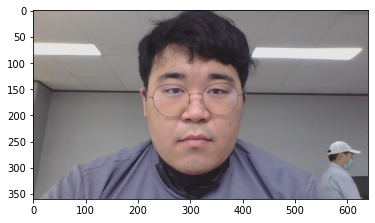

In [4]:
#Ïù¥ÎØ∏ÏßÄ ÌôïÏù∏ÌïòÍ∏∞
# plt.imshow Ïù¥Ï†ÑÏóê RGB Ïù¥ÎØ∏ÏßÄÎ°ú Î∞îÍæ∏Îäî Í≤ÉÏùÑ ÏûäÏßÄÎßàÏÑ∏Ïöî. 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGBA)
plt.imshow(img_rgb)
plt.show()

In [5]:
img_show.shape

(360, 640, 4)

In [6]:
import dlib
detector_hog = dlib.get_frontal_face_detector()   #- detector ÏÑ†Ïñ∏
print("üå´üõ∏")

üå´üõ∏


In [7]:
#boundingbox Ï∂îÏ∂úÌïòÍ∏∞
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   #- (image, num of img pyramid)
print("üå´üõ∏")

üå´üõ∏


rectangles[[(221, 98) (407, 284)]]


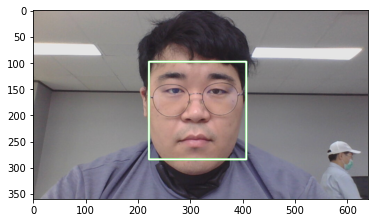

In [8]:
#Ï∂úÎ†•ÌïòÍ∏∞
print(dlib_rects)   # Ï∞æÏùÄ ÏñºÍµ¥ÏòÅÏó≠ Ï¢åÌëú

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGBA)
plt.imshow(img_show_rgb)
plt.show()

In [9]:
import os
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
print("üå´üõ∏")

üå´üõ∏


In [10]:
#landmark Ìï®Ïàò ÏÑ§Ï†ï
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


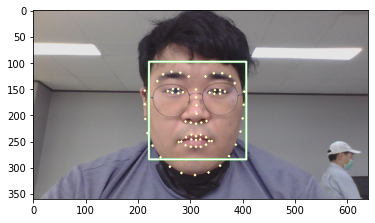

In [11]:
#landmark ÌëúÏãúÌïòÍ∏∞
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGBA)
plt.imshow(img_show_rgb)
plt.show()

In [12]:
img_show_rgb.shape

(360, 640, 4)

In [13]:
#ÏãúÏûëÏ†ê Ï¢åÌëú ÌôïÏù∏
x1 = (landmark[2][0] +  landmark[36][0] +  landmark[48][0] +  landmark[30][0])/4
y1 = (landmark[2][1] +  landmark[36][1] +  landmark[48][1] +  landmark[30][1])/4
x2 = (landmark[14][0] +  landmark[45][0] +  landmark[54][0] +  landmark[30][0])/4
y2 = (landmark[14][1] +  landmark[45][1] +  landmark[54][1] +  landmark[30][1])/4
print("({0}, {1})".format(x1, y1)) #ÏãúÏûëÏ†ê Ï¢åÌëú
print("({0}, {1})".format(x2, y2)) #Î∞òÎåÄÌé∏ ÎåÄÏπ≠ÎêòÎäî Ï†êÏùò xÏ¢åÌëú

(265.25, 202.25)
(354.75, 201.75)


In [14]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # nose center index : 30
    x = landmark[30][0]
    y = landmark[30][1]
    w = int((landmark[30][0] - x1) *2) # Ïä§Ìã∞Ïª§Ïùò ÎÑàÎπÑÎäî Ïù¥ÎØ∏ÏßÄ ÏãúÏûëÏ†ê ~ ÏñºÍµ¥ Ï§ëÏã¨ÍπåÏßÄÏùò Í±∞Î¶¨ X 2
#     w = int(x2 - x1)
    h = int(dlib_rect.width() / 4)
#     h = int((y1 - landmark[30][1]) * 2)
    print ('(x,y) : (%d,%d)'%(x,y)) #Ïä§Ìã∞Ïª§ ÏúÑÏπò
    print ('(w,h) : (%d,%d)'%(w,h)) #Ïä§Ìã∞Ïª§ ÌÅ¨Í∏∞

(312, 197)
(x,y) : (312,197)
(w,h) : (93,46)


In [15]:
#Ïä§Ìã∞Ïª§ Î∂àÎü¨Ïò§Í∏∞

svg_url = 'https://image.flaticon.com/icons/svg/24/24674.svg'

svg_data = requests.get(svg_url).content

png = svg2png(bytestring=svg_data)

pil_img = Image.open(BytesIO(png)).convert('RGBA')
cv_img = cv2.cvtColor(np.array(pil_img), cv2.COLOR_BGRA2RGBA)
img_sticker = cv2.resize(cv_img, (w,h))
print (img_sticker.shape)

(46, 93, 4)


In [16]:
# #Ïä§Ìã∞Ïª§ Î∂àÎü¨Ïò§Í∏∞
# import os
# sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat.png'
# img_sticker = cv2.imread(sticker_path)
# img_sticker = cv2.resize(img_sticker, (w,h))
# print (img_sticker.shape)

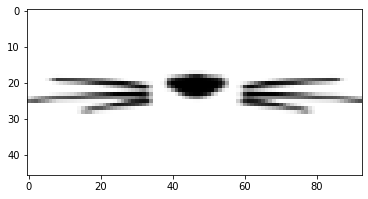

In [17]:
plt.imshow(img_sticker)
plt.show()

In [18]:
# refined_x = x - w // 2  # left
# refined_y = y - h       # top
refined_x = int(x1)
refined_y = int(y1)
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (265,202)


In [19]:
#Ï¢åÌëúÍ∞Ä Ï†ïÏÉÅÏúºÎ°ú ÎÇòÏôîÏúºÎØÄÎ°ú ÏÉùÎûµ
# img_sticker = img_sticker[-refined_y:]
# print (img_sticker.shape)

In [20]:
#ÏõêÎ≥∏ Ïù¥ÎØ∏ÏßÄÏóê Ïä§Ìã∞Ïª§ Ï†ÅÏö©
sticker_area = img_show[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x + img_sticker.shape[1]]
img_show[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)

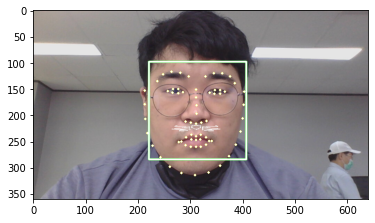

In [21]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGRA2RGBA))
plt.show()

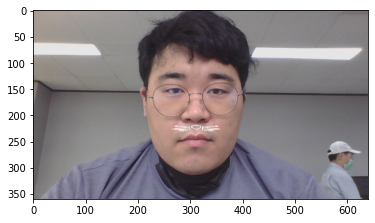

In [22]:
#bounding boxÏôÄ landmarkÏ†úÍ±∞
sticker_area = img_bgr[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x + img_sticker.shape[1]]
img_bgr[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x + img_sticker.shape[1]] = \
    np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGBA))
plt.show()

In [23]:
img_bgr3 = cv2.imread('./images/image1.png')
# img_bgr = cv2.imread('./images/image.jpg', 0) #gray scale(ÌùëÎ∞±)Î°ú ÏùΩÍ∏∞
img_bgra3 = cv2.cvtColor(img_bgr3, cv2.COLOR_RGB2RGBA) #ÏïåÌååÏ±ÑÎÑê Ï∂îÍ∞Ä
img_bgr3 = cv2.resize(img_bgra3, (640, 360))
img_show3 = img_bgr3.copy() # Ï∂úÎ†•Ïö© Ïù¥ÎØ∏ÏßÄ Î≥µÏÇ¨
img_rgb3 = cv2.cvtColor(img_bgr3, cv2.COLOR_BGR2RGB)
dlib_rects3 = detector_hog(img_rgb3, 1)

rectangles[[(275, 74) (319, 118)], [(89, 61) (141, 113)], [(511, 295) (554, 338)], [(504, 182) (556, 234)], [(287, 267) (349, 329)]]


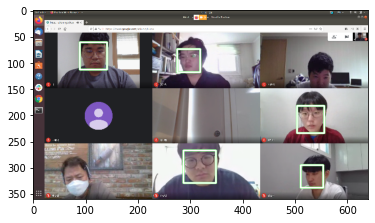

In [24]:
print(dlib_rects3)   # Ï∞æÏùÄ ÏñºÍµ¥ÏòÅÏó≠ Ï¢åÌëú

for dlib_rect in dlib_rects3:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show3, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb3 =  cv2.cvtColor(img_show3, cv2.COLOR_BGR2RGBA)
plt.imshow(img_show_rgb3)
plt.show()

In [25]:
img_bgr3 = cv2.imread('./images/image4.jpg')
# img_bgr = cv2.imread('./images/image.jpg', 0) #gray scale(ÌùëÎ∞±)Î°ú ÏùΩÍ∏∞
img_bgra3 = cv2.cvtColor(img_bgr3, cv2.COLOR_RGB2RGBA) #ÏïåÌååÏ±ÑÎÑê Ï∂îÍ∞Ä
img_bgr3 = cv2.resize(img_bgra3, (640, 360))
img_show3 = img_bgr3.copy() # Ï∂úÎ†•Ïö© Ïù¥ÎØ∏ÏßÄ Î≥µÏÇ¨
img_rgb3 = cv2.cvtColor(img_bgr3, cv2.COLOR_BGR2RGB)
dlib_rects3 = detector_hog(img_rgb3, 1)

rectangles[[(285, 180) (328, 223)]]


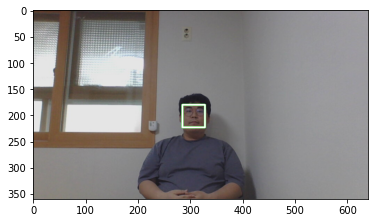

In [26]:
print(dlib_rects3)   # Ï∞æÏùÄ ÏñºÍµ¥ÏòÅÏó≠ Ï¢åÌëú

for dlib_rect in dlib_rects3:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show3, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb3 =  cv2.cvtColor(img_show3, cv2.COLOR_BGR2RGBA)
plt.imshow(img_show_rgb3)
plt.show()

In [27]:
img_bgr3 = cv2.imread('./images/image5.jpg')
# img_bgr = cv2.imread('./images/image.jpg', 0) #gray scale(ÌùëÎ∞±)Î°ú ÏùΩÍ∏∞
img_bgra3 = cv2.cvtColor(img_bgr3, cv2.COLOR_RGB2RGBA) #ÏïåÌååÏ±ÑÎÑê Ï∂îÍ∞Ä
img_bgr3 = cv2.resize(img_bgra3, (360, 640))
img_show3 = img_bgr3.copy() # Ï∂úÎ†•Ïö© Ïù¥ÎØ∏ÏßÄ Î≥µÏÇ¨
img_rgb3 = cv2.cvtColor(img_bgr3, cv2.COLOR_BGR2RGB)
dlib_rects3 = detector_hog(img_rgb3, 1)

rectangles[]


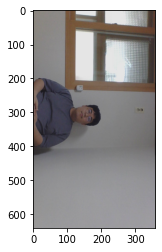

In [28]:
print(dlib_rects3)   # Ï∞æÏùÄ ÏñºÍµ¥ÏòÅÏó≠ Ï¢åÌëú

for dlib_rect in dlib_rects3:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show3, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb3 =  cv2.cvtColor(img_show3, cv2.COLOR_BGR2RGBA)
plt.imshow(img_show_rgb3)
plt.show()

Ìï¥ÏÉÅÎèÑÎßå Ï∂©Î∂ÑÌïòÎã§Î©¥ Ïù¥ÎØ∏ÏßÄÍ∞Ä ÏûëÍ±∞ÎÇò(Î©ÄÍ±∞ÎÇò) Ïó¨Îü¨ ÏÇ¨ÎûåÏùÑ ÎèôÏãúÏóê Ïù∏ÏãùÌïòÎäî Í∏∞Îä•ÎèÑ Í∞ÄÎä•ÌïòÎã§. ÌïòÏßÄÎßå ÏñºÍµ¥ÏùÑ 90ÎèÑÎ°ú ÎèåÎ¶¨Í±∞ÎÇò ÏñºÍµ¥ Ïú§Í≥ΩÏùò ÏùºÎ∂ÄÍ∞Ä ÏûòÎ¶¨Í±∞ÎÇò Îàà, ÏΩî, ÏûÖ Ï§ë ÌïòÎÇòÎùºÎèÑ Ïù∏ÏãùÌïòÏßÄ Î™ªÌïòÎ©¥ ÏñºÍµ¥Î°ú Ïù∏ÏãùÌïòÏßÄ Î™ªÌïúÎã§.

In [29]:
img_bgr2 = cv2.imread('./images/image3.jpg')
# img_bgr = cv2.imread('./images/image.jpg', 0) #gray scale(ÌùëÎ∞±)Î°ú ÏùΩÍ∏∞
img_bgra2 = cv2.cvtColor(img_bgr2, cv2.COLOR_RGB2RGBA) #ÏïåÌååÏ±ÑÎÑê Ï∂îÍ∞Ä
img_bgr2 = cv2.resize(img_bgra2, (640, 360))
img_show2 = img_bgr2.copy() # Ï∂úÎ†•Ïö© Ïù¥ÎØ∏ÏßÄ Î≥µÏÇ¨

In [30]:
img_rgb2 = cv2.cvtColor(img_bgr2, cv2.COLOR_BGR2RGB)
dlib_rects2 = detector_hog(img_rgb2, 1)   #- (image, num of img pyramid)
print("üå´üõ∏")

üå´üõ∏


rectangles[[(311, 96) (440, 225)]]


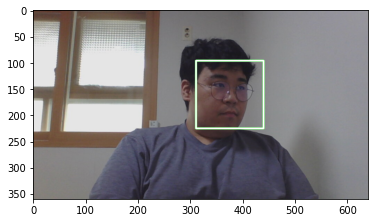

In [31]:
#Ï∂úÎ†•ÌïòÍ∏∞
print(dlib_rects2)   # Ï∞æÏùÄ ÏñºÍµ¥ÏòÅÏó≠ Ï¢åÌëú

for dlib_rect in dlib_rects2:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show2, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb2 =  cv2.cvtColor(img_show2, cv2.COLOR_BGR2RGBA)
plt.imshow(img_show_rgb2)
plt.show()

ÏñºÍµ¥Ïùò Ï∏°Î©¥ Ïó≠Ïãú Îàà, ÏΩî, ÏûÖÏù¥ Î™®Îëê Î≥¥Ïó¨Ïïº Ïù∏ÏãùÌïòÍ∏∞ÎïåÎ¨∏Ïóê ÏÇ¨Ïã§ÏÉÅ Ï†ïÎ©¥ÎßåÏùÑ Ïù∏ÏãùÌïúÎã§Í≥† Î≥¥ÏïÑÏïºÌïúÎã§.

In [32]:
list_landmarks2 = []
for dlib_rect in dlib_rects2:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks2.append(list_points)

print(len(list_landmarks2[0]))

68


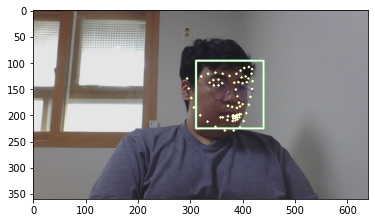

In [33]:
#landmark ÌëúÏãúÌïòÍ∏∞
for landmark2 in list_landmarks2:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show2, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show2, cv2.COLOR_BGR2RGBA)
plt.imshow(img_show_rgb)
plt.show()

ÏùåÏòÅÏù¥ ÏßôÍ≥† ÎààÏΩîÏûÖÏùò ÎπÑÏú®Ïù¥ Îã¨ÎùºÏßÄÏûê Ïù¥Ï†ÑÍ≥º Îã§Î•¥Í≤å Ï†ïÌôïÌïòÍ≤å Î™ª Ï∞æÎäî ÌòïÌÉúÍ∞Ä Î≥¥Ïù∏Îã§.

In [34]:
#ÏãúÏûëÏ†ê Ï¢åÌëú ÌôïÏù∏
x1 = (landmark2[2][0] +  landmark2[36][0] +  landmark2[48][0] +  landmark2[30][0])/4
y1 = (landmark2[2][1] +  landmark2[36][1] +  landmark2[48][1] +  landmark2[30][1])/4
x2 = (landmark2[14][0] +  landmark2[45][0] +  landmark2[54][0] +  landmark2[30][0])/4
y2 = (landmark2[14][1] +  landmark2[45][1] +  landmark2[54][1] +  landmark2[30][1])/4
print("({0}, {1})".format(x1, y1)) #ÏãúÏûëÏ†ê Ï¢åÌëú
print("({0}, {1})".format(x2, y2)) #Î∞òÎåÄÌé∏ ÎåÄÏπ≠ÎêòÎäî Ï†êÏùò Ï¢åÌëú

(347.5, 171.25)
(404.75, 163.5)


In [35]:
landmark2[30]

(393, 176)

In [36]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # nose center index : 30
    x = landmark2[30][0]
    y = landmark2[30][1]
    w = int((landmark2[30][0] - x1) *2) # Ïä§Ìã∞Ïª§Ïùò ÎÑàÎπÑÎäî Ïù¥ÎØ∏ÏßÄ ÏãúÏûëÏ†ê ~ ÏñºÍµ¥ Ï§ëÏã¨ÍπåÏßÄÏùò Í±∞Î¶¨ X 2
#     w = int(x2 - x1)
    h = int(dlib_rect.width() / 4)
#     h = int((y1 - landmark[30][1]) * 2)
    print ('(x,y) : (%d,%d)'%(x,y)) #Ïä§Ìã∞Ïª§ ÏúÑÏπò
    print ('(w,h) : (%d,%d)'%(w,h)) #Ïä§Ìã∞Ïª§ ÌÅ¨Í∏∞

(312, 197)
(x,y) : (393,176)
(w,h) : (91,46)


In [37]:
refined_x = int(x1)
refined_y = int(y1)

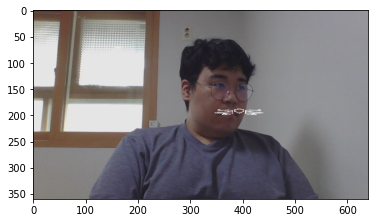

In [38]:
sticker_area = img_bgr2[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x + img_sticker.shape[1]]
img_bgr2[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x + img_sticker.shape[1]] = \
    np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr2, cv2.COLOR_BGR2RGBA))
plt.show()

Í∑∏Îü¨ÎÇò ÏñºÍµ¥Î°ú Ïù∏ÏãùÌïòÎçîÎùºÎèÑ Ïù¥ÏôÄÍ∞ôÏù¥ ÏñºÍµ¥Ïùò Ï§ëÏã¨ÏóêÏÑú ÏñëÏ™ΩÏù¥ ÎπÑÎåÄÏπ≠Ïù¥ Ïù¥Î£®Ïñ¥ÏßÄÎäî Í≤ΩÏö∞ ÏΩîÏùò ÏúÑÏπò(ÏñºÍµ¥Ïùò Ï§ëÏã¨)Ïù¥ Ï°∞Í∏à ÎπóÎÇòÍ∞ÄÏûê ÎçÆÏñ¥ÏîåÏö∞Îäî Ïä§Ìã∞Ïª§ Ïó≠Ïãú ÏÉÅÎãπÌûà ÎπóÎÇòÍ∞ÄÍ≤åÎêúÎã§.

# Îç∞Ïù¥ÌÑ∞ Ï≤òÎ¶¨
ÏÇ¨Ïö©Ìï† Ïä§Ìã∞Ïª§ Îç∞Ïù¥ÌÑ∞Ïùò Ï±ÑÎÑêÏùÄ 4Ï±ÑÎÑê(R, G, B, alpha)Ïù¥Îã§.
np.where()Ìï®ÏàòÏùò Í≤ΩÏö∞ Îç∞Ïù¥ÌÑ∞Ïùò ÏÇ¨Ïù¥Ï¶àÍ∞Ä Ï†ïÌôïÌûà ÏùºÏπòÌï¥ÏïºÌïòÍ∏∞ ÎïåÎ¨∏Ïóê Í∏∞Ï°¥ 3Ï±ÑÎÑêÏùò Ïù¥ÎØ∏ÏßÄ Îç∞Ïù¥ÌÑ∞Ïóê ÏïåÌååÏ±ÑÎÑêÏùÑ ÎßåÎì§Ïñ¥ ÎçîÎØ∏Îç∞Ïù¥ÌÑ∞Î•º ÏßëÏñ¥ÎÑ£Ïñ¥Ï£ºÏóàÎã§.
ÎòêÌïú Îàà, ÏΩî, ÏûÖÏù¥ Í∞ÄÎ†§ÏßÄÍ±∞ÎÇò ÏñºÍµ¥ Ïú§Í≥ΩÏùò ÏùºÎ∂ÄÍ∞Ä ÏûòÎ¶∞ Í≤ΩÏö∞ ÏñºÍµ¥Î°ú Ïù∏ÏãùÌïòÏßÄ Î™ªÌïòÎäî Î¨∏Ï†úÍ∞Ä Î∞úÏÉùÌñàÎã§. ÏòÜ Î™®Ïäµ Ïó≠Ïãú ÏñëÏ™Ω ÎààÏù¥ Î™®Îëê Î≥¥Ïó¨Ïïº ÏñºÍµ¥Î°ú Ïù∏ÏãùÌñàÎã§.

# Ï¢åÌëú ÏÑ§Ï†ï
ÏßëÏñ¥ÎÑ£ÏùÑ Ïù¥ÎØ∏ÏßÄÏùò ÌÅ¨Í∏∞Îäî ÏàòÏóº ÏûêÎ¶¨Ïóê ÎßûÏ∂îÏñ¥ ÏûÖÍº¨Î¶¨, ÏñºÍµ¥ Ïú§Í≥Ω, ÎààÍº¨Î¶¨, ÏΩî Î•º Í∏∞Ï§ÄÏúºÎ°ú Ï§ëÍ∞ÑÍ∞íÏùÑ Íµ¨ÌïòÏòÄÏúºÎ©∞ ÎÜíÏù¥Ïùò Í≤ΩÏö∞Îßå Ï°∞Í∏à ÎäòÎ†§ÏÑú ÏÇΩÏûÖÌïòÏòÄÎã§.

# Ï¥ùÌèâ
ÏÜçÎèÑÏóê ÏûàÏñ¥ÏÑ† Î™®Îç∏Ïù¥ ÏÉÅÎãπÌûà Í∞ÄÎ≤ºÏõ†ÏßÄÎßå Ï†ïÌôïÎèÑÏôÄ ÏÑ±Îä•Ïóê ÏûàÏñ¥ÏÑ† Î∂ÄÏ°±Ìï®Ïù¥ ÎäêÍª¥Ï°åÎã§.
Í∞ÄÏû• ÌÅ∞ Î¨∏Ï†úÎäî Í∑∏ÎûòÎîîÏñ∏Ìä∏ Î≥ÄÌôîÎ•º Í∏∞Ï§ÄÏúºÎ°ú Îàà, ÏΩî, ÏûÖÏùÑ Ï†ïÌïòÍ∏∞ ÎïåÎ¨∏Ïóê ÏùåÏòÅÏù¥ ÏßôÏùÄ Í≤ΩÏö∞, Îòê ÎààÏçπÍ≥º ÎààÏù¥ ÏßôÍ±∞ÎÇò ÏòÖÏùÄ Í≤ΩÏö∞ÏóêÎäî Ï†ïÌôïÌûà Íµ¨Î∂ÑÌïòÏßÄ Î™ªÌïòÎäî Î¨∏Ï†úÍ∞Ä Î∞úÏÉùÌïòÏòÄÎã§.
Ïù¥Î•º ÏúÑÌï¥ÏÑ† ÎààÍ≥º ÎààÏçπÍ∞ôÏù¥ ÏñºÍµ¥Ïùò ÏùºÎ∂Ä Ï§ë Í∞ÄÏû• ÎßéÏùÄ Í≤ΩÏö∞Ïóê ÎÇòÌÉÄÎÇòÎ©¥ÏÑúÎèÑ ÎèÑÎìúÎùºÏßÄÎäî ÌäπÏßïÏóê Î∞∞Ï†êÏùÑ ÎÜíÍ≤åÌïòÏó¨ Ïù¥Î•º Í∏∞Ï§ÄÏúºÎ°ú Ï∞æÎäî Î∞©ÏãùÏù¥ ÏûàÏùÑ Ïàò ÏûàÏùÑ Í≤É Í∞ôÎã§ Îã§Îßå Ïù¥ Í≤ΩÏö∞ ÏñºÍµ¥Î°ú Î≥¥Îäî Î≤îÏúÑÍ∞Ä Îß§Ïö∞ ÎäòÏñ¥ÎÇ† Í≤ÉÏù¥Îã§.